### Creating an ANN with Pytorch

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
import seaborn as sns

In [7]:
import numpy as np

df['Outcome'] = np.where(df['Outcome'] ==1, "Diabetic", "Non Diabetic")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


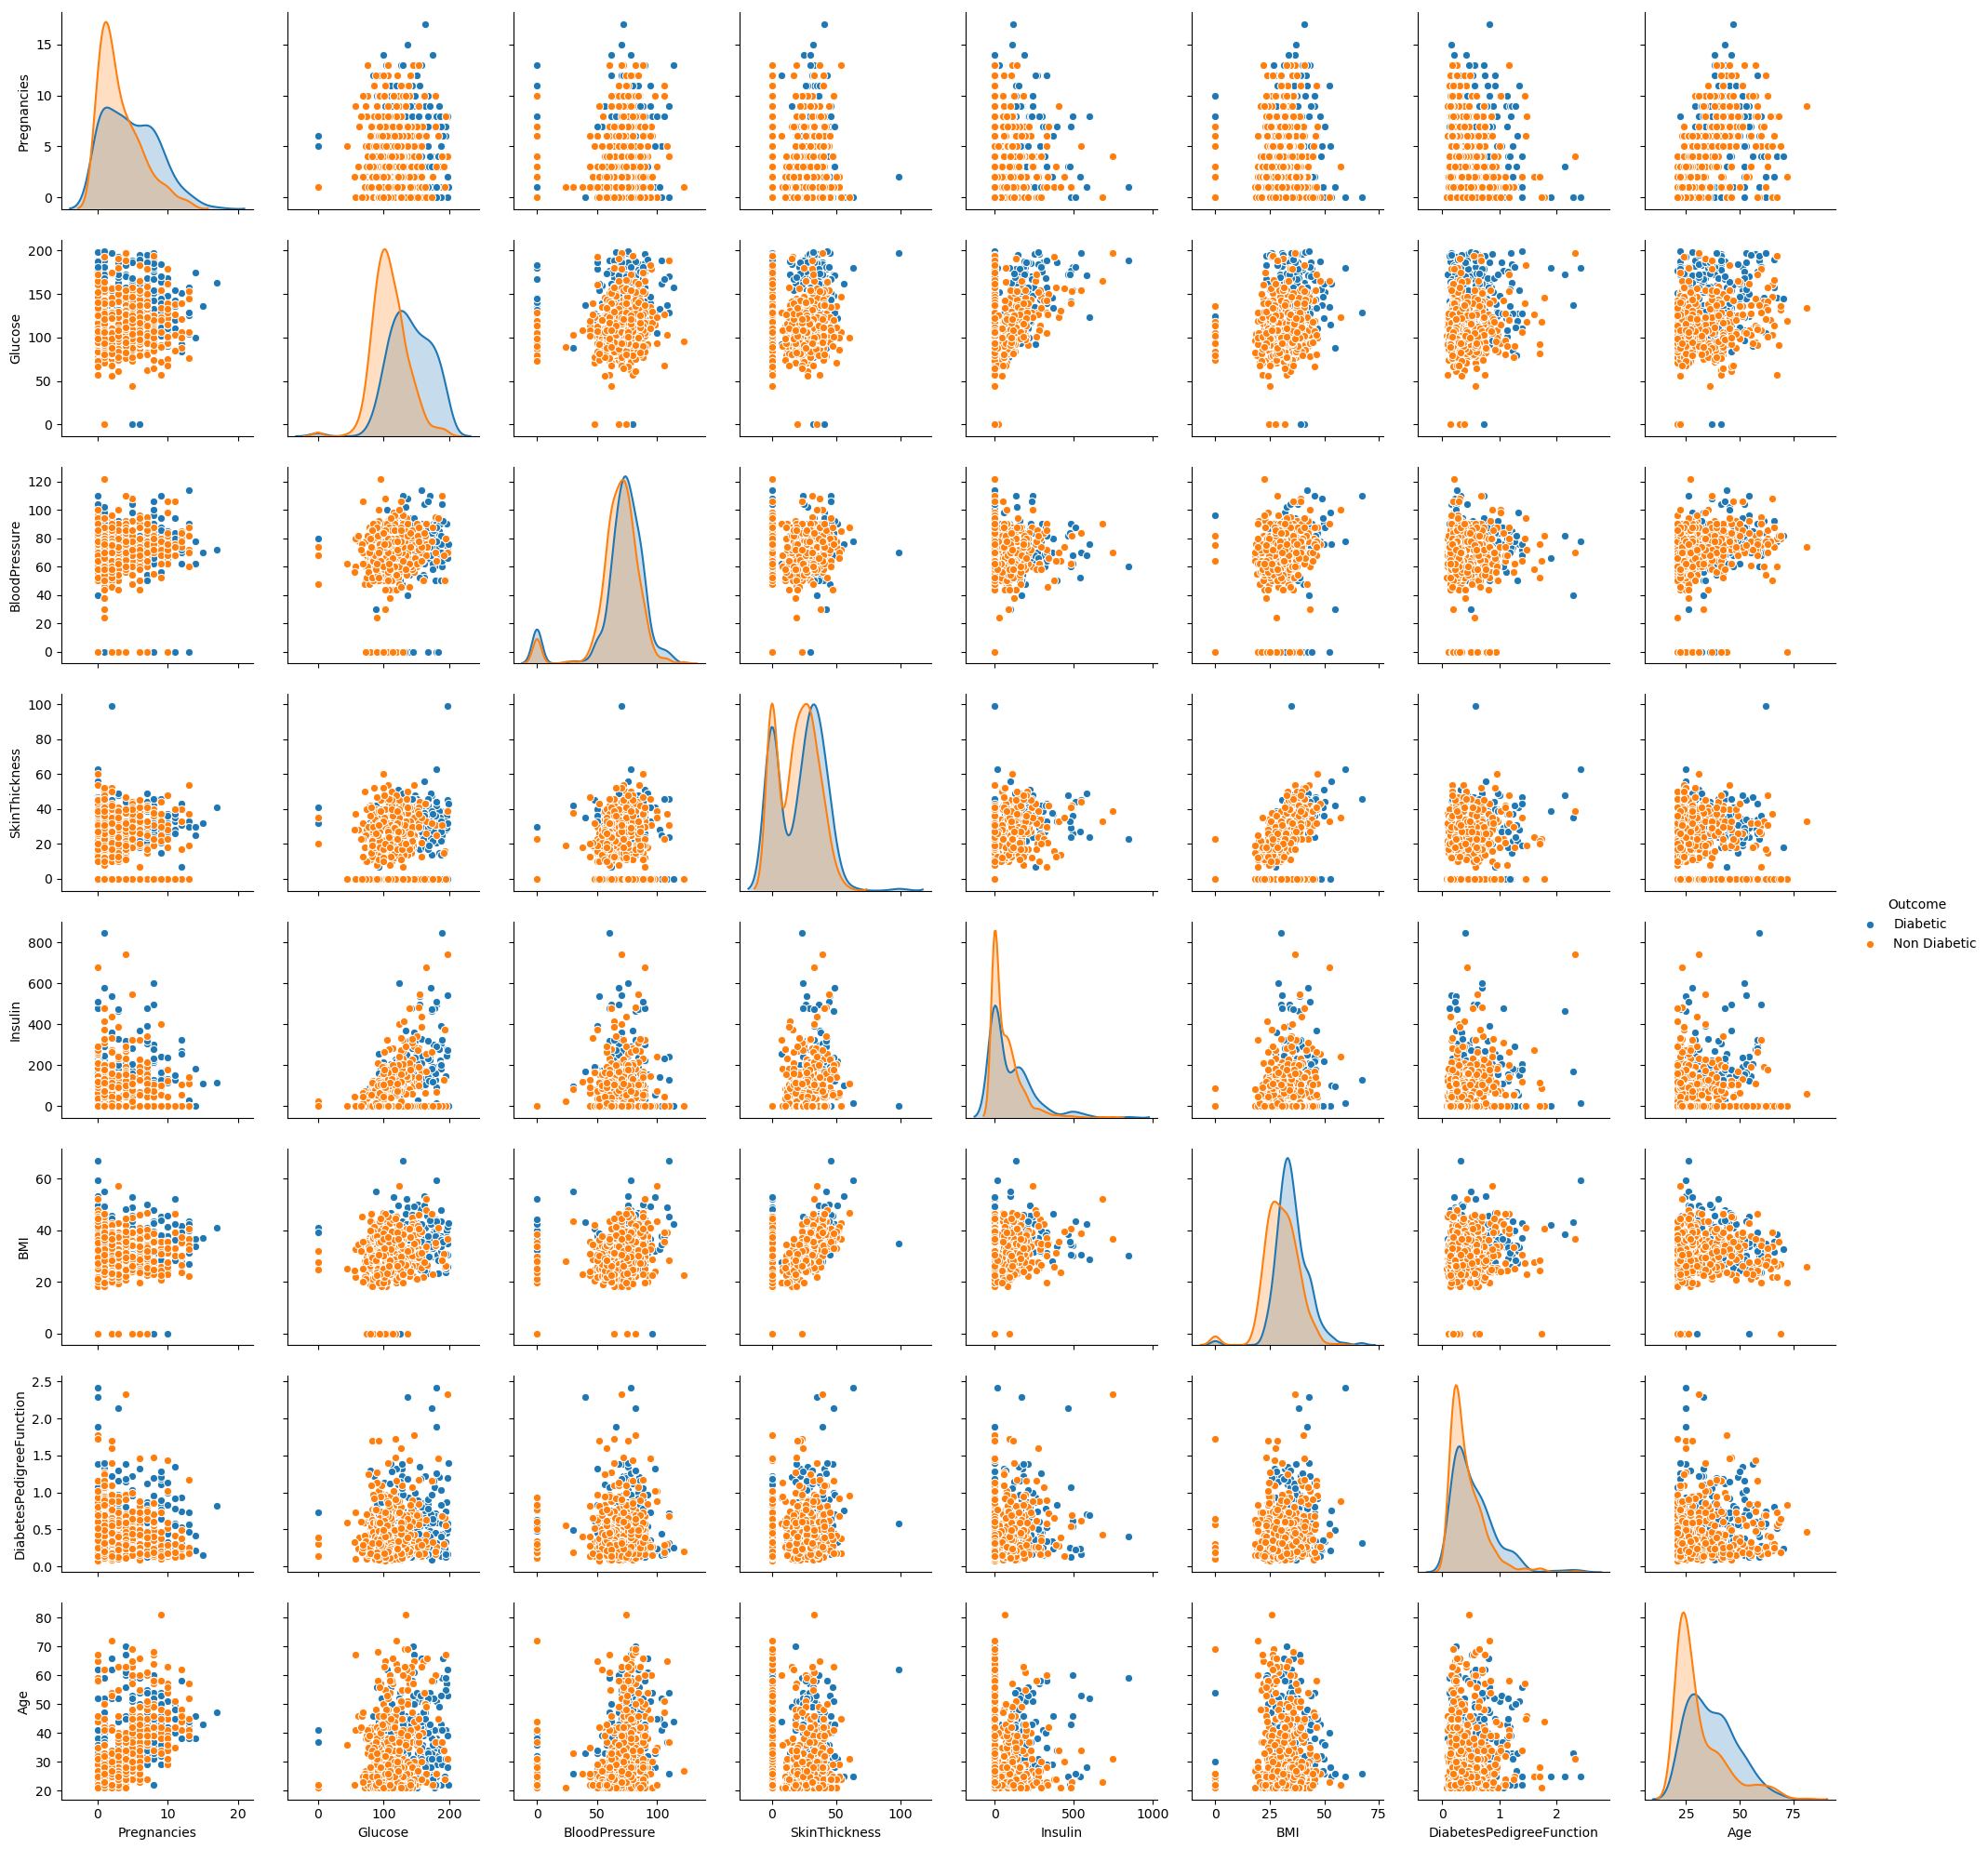

In [9]:
sns.pairplot(df, hue = 'Outcome')

In [10]:
df = pd.read_csv("diabetes.csv")

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
from sklearn.model_selection import train_test_split

x = df.drop('Outcome', axis = 1).values
y =  df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [14]:
# Libraries from pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

In [15]:
# Creating the Tensors

x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
# Creating the model with Pytorch

class ANN_Model(nn.Module):
    def __init__(self, input_features = 8, hidden1=20,hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)

        return x

In [25]:
# Instantiate the ANN_model
torch.manual_seed(20)
model = ANN_Model()

In [26]:
model.parameters()

<generator object Module.parameters at 0x000001528E1B3A20>

In [27]:
# backward propagation - Define the loss_function, define the optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [59]:
epochs = 5000
final_losses = []

for i in range(epochs):
    i = i+1

    y_pred = model.forward(x_train)
    loss = loss_function(y_pred, y_train)

    final_losses.append(loss)

    if i%10 == 1:
        print(f"Epoch number :{i} and the loss: {loss.item()} ")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch number :1 and the loss: 0.08801288902759552 
Epoch number :11 and the loss: 0.08750019967556 
Epoch number :21 and the loss: 0.08719483762979507 
Epoch number :31 and the loss: 0.08709786087274551 
Epoch number :41 and the loss: 0.08640306442975998 
Epoch number :51 and the loss: 0.08588612824678421 
Epoch number :61 and the loss: 0.08552706241607666 
Epoch number :71 and the loss: 0.08510347455739975 
Epoch number :81 and the loss: 0.08487088978290558 
Epoch number :91 and the loss: 0.08444447815418243 
Epoch number :101 and the loss: 0.08425775170326233 
Epoch number :111 and the loss: 0.0839349552989006 
Epoch number :121 and the loss: 0.08346043527126312 
Epoch number :131 and the loss: 0.0831385999917984 
Epoch number :141 and the loss: 0.0828888863325119 
Epoch number :151 and the loss: 0.08259666711091995 
Epoch number :161 and the loss: 0.08228988200426102 
Epoch number :171 and the loss: 0.08209960907697678 
Epoch number :181 and the loss: 0.08186174929141998 
Epoch numb

In [60]:
# Plotting the loss function
import matplotlib.pyplot as plt

%matplotlib.pyplot inline

UsageError: Line magic function `%matplotlib.pyplot` not found.


Text(0.5, 0, 'Epochs')

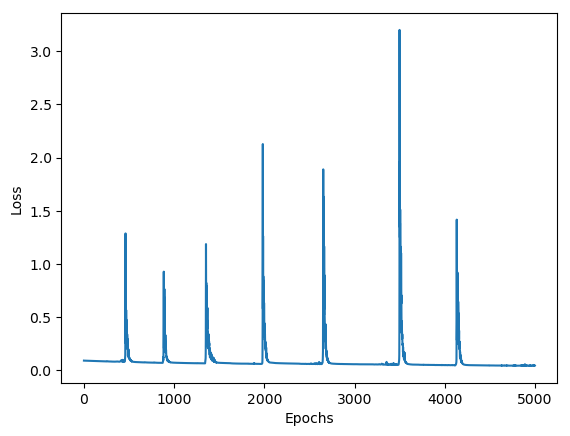

In [61]:
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [62]:
# Prediction in x_test data

prediction = []
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_pred = model(data)
        prediction.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
0
0
1
1
1
1
1
1
0
1
0
0
1
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
1
0
1
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
1
1
0
0
1
0
1
1
0
0
0
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
1
1
0
0
0
1
1
0
1
0
1
0
1
1
1
0
1
0
0
0
1
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0


In [63]:
prediction

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

In [65]:
cm

array([[80, 27],
       [19, 28]], dtype=int64)

Text(95.72222222222221, 0.5, 'pred value')

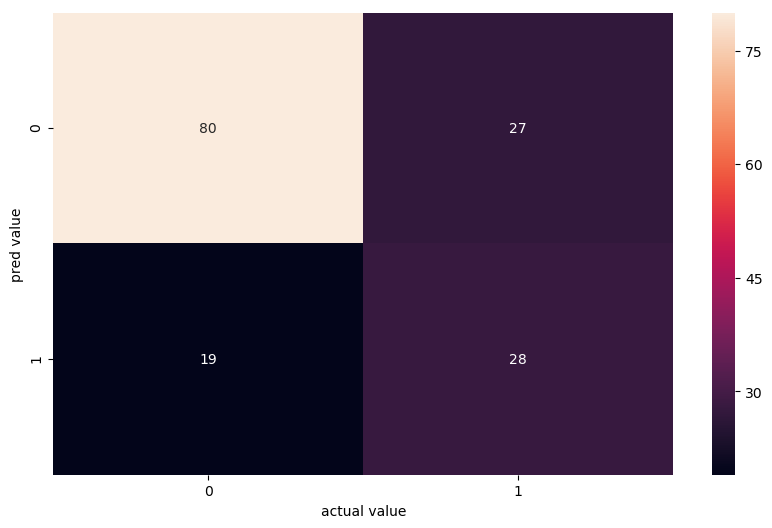

In [66]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm,annot=True)
plt.xlabel('actual value')
plt.ylabel('pred value')

In [73]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, prediction)

In [74]:
score

0.7012987012987013

In [69]:
# Save the model
torch.save(model, 'diabetes.pt')

In [70]:
model = torch.load('diabetes.pt')

In [71]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [75]:
# Prediction of a new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [76]:
list1 = [6.0, 148.0, 72.0, 38.0, 0.0, 25.6, 0.627, 45.0]

In [77]:
new_data = torch.tensor(list1)

In [78]:
# prediction of a new data point using pytorch

with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())



tensor([ 7.6603, -2.0167])
0
